In [8]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
import re
import numpy
import numpy as np
from matplotlib import reload
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import Error
import nltk
reload(Error)

<module 'Error' from 'U:\\JIRA\\Code\\Error.py'>

In [4]:
def replace_strings(data,name):
    for i in range(len(data)):
        if(data[name].iloc[i].find(',')!=-1):
            data[name].iloc[i]=data[name].iloc[i].split(",")[-1]
        
    return data

In [6]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

def predict_category(s,train, model,names):
    pred = model.predict([s])
    return pred


In [9]:
data=pd.read_excel("U:/JIRA/JIRAExport/train_data.xls")
data['Description'] = data['Description'].str.replace('[^a-zA-Z]',' ').str.lower()
stop_re = '\\b'+'\\b|\\b'.join(nltk.corpus.stopwords.words('english'))+'\\b'
data['Description'] = data['Description'].str.replace(stop_re, '')
data.head()

,Issue Key,Summary,Status,Created,Component/s,Description,Resolved Date
0,NCG3D-75861,CLONE - When a pohne without any music connect...,Closed,2017-11-14 12:11:20,SW_INFOTAINMENT,h test environment hw sample p r de...,2018-01-24 10:25:31
1,NCG3D-75863,Reset when system is kept idle,Closed,2017-11-14 12:38:12,SW_MANAPPS,h test environment hw sample device...,2017-11-15 07:12:04
2,NCG3D-75864,Several resets during 35 km drive,Closed,2017-11-14 12:48:53,SW_Resets,h test environment hw sample dual lig...,2017-11-14 14:02:45
3,NCG3D-75865,System is sometimes very sluggish when driving,Closed,2017-11-14 13:04:58,NaN,h test environment hw sample dual li...,2018-08-16 06:19:38
4,NCG3D-75867,"After reaching the destination, the navi conti...",Closed,2017-11-14 13:14:17,SW_NAVIGATION,h test environment sw hw sample ...,2017-11-22 11:12:34


In [10]:
data=data.dropna()

data=replace_strings(data,'Component/s')
comp2=list(data['Component/s'].unique())
#comp=list(set().union(comp1,comp2))
Comp=[]
for each in comp2:
    if(each.find(',')!=-1):
        Comp.append(each.split(",")[-1])
    else:
        Comp.append(each)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
train=data.sample(frac=0.90,random_state=120)
test=data.drop(train.index)


In [12]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['Description'])
X_train_counts.shape

(74333, 39877)

In [13]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(74333, 39877)

In [14]:
clf = MultinomialNB().fit(X_train_tfidf, train['Component/s'])
print(clf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [15]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(train['Description'], train['Component/s'])

In [16]:
predicted = text_clf.predict(test['Description'])
np.mean(predicted == test['Component/s'])

0.47209105218549463

In [17]:
Error.err.class_err(test['Component/s'],predicted)

SW_SPEECH 0.5658153241650294
SW_DRIVEASSIST 0.2584745762711864
SW_DIAGNOSTIC 0.396078431372549
SW_INFOTAINMENT 0.5734265734265734
SW_NAVIGATION 0.9720634920634921
SW_SMARTPHONE 0.5072202166064982
SW_PROFILE 0.0
SW_CONFIG_MGR 0.0
SW_PHONE 0.8578616352201258
SW_TELEMATIC 0.2534562211981567
SW_Master_HMI 0.0
SW_TUNER_DAB 0.0
SW_NAVIGATION_JPN 0.103125
SW_Resets 0.37857142857142856
SW_WIFI 0.0
SW_PARKASSIST 0.49504950495049505
SW_TUNER_SXM 0.3814814814814815
SW_TUNER_AMFM 0.3143939393939394
SW_SWUPDATE 0.23134328358208955
SW_SYSTEM 0.05405405405405406
SW_SPM 0.0
SW_AUDIO 0.07514450867052024
SW_HOME_MENU 0.023148148148148147
SW_METER 0.007751937984496124
SW_FRAMEWORK_HMI 0.0
SW_TUNER_TV 0.0
SW_Unknown 0.0
SW_Base 0.0
SW_MANAPPS 0.2708333333333333
SW_TRANSLATIONS 0.0
SW_DEBUG_TRACE 0.0
SW_TUNERGENERIC 0.0
SW_ADR3 0.0
Mechanic 0.8227848101265823
TEST_EMC 0.0
SW_OTAS 0.047619047619047616
Production-Test 0.0
SW_WIDGETS 0.0
SW_TUNER_HD 0.0
TEST_FEP 0.06521739130434782
SW_DATA 0.0
SW_NETWORKING 0

In [18]:
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB(fit_prior=False))])

text_mnb_stemmed = text_mnb_stemmed.fit(train['Description'], train['Component/s'])

predicted_mnb_stemmed = text_mnb_stemmed.predict(test['Description'])

np.mean(predicted_mnb_stemmed == test['Component/s'])

0.5590265165274246

In [19]:
Error.err.class_err(test['Component/s'],predicted_mnb_stemmed)

SW_SPEECH 0.6679764243614931
SW_DRIVEASSIST 0.4364406779661017
SW_DIAGNOSTIC 0.5333333333333333
SW_INFOTAINMENT 0.6363636363636364
SW_NAVIGATION 0.9352380952380952
SW_SMARTPHONE 0.6119133574007221
SW_PROFILE 0.12
SW_CONFIG_MGR 0.0
SW_PHONE 0.8742138364779874
SW_TELEMATIC 0.5023041474654378
SW_Master_HMI 0.026595744680851064
SW_TUNER_DAB 0.019230769230769232
SW_NAVIGATION_JPN 0.559375
SW_Resets 0.40714285714285714
SW_WIFI 0.012658227848101266
SW_PARKASSIST 0.6435643564356436
SW_TUNER_SXM 0.6037037037037037
SW_TUNER_AMFM 0.45454545454545453
SW_SWUPDATE 0.5223880597014925
SW_SYSTEM 0.20463320463320464
SW_SPM 0.022222222222222223
SW_AUDIO 0.1676300578034682
SW_HOME_MENU 0.14814814814814814
SW_METER 0.06201550387596899
SW_FRAMEWORK_HMI 0.046242774566473986
SW_TUNER_TV 0.021739130434782608
SW_Unknown 0.0
SW_Base 0.027777777777777776
SW_MANAPPS 0.3958333333333333
SW_TRANSLATIONS 0.0
SW_DEBUG_TRACE 0.0
SW_TUNERGENERIC 0.0
SW_ADR3 0.0
Mechanic 0.9367088607594937
TEST_EMC 0.6666666666666666
SW_O

In [20]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train['Description'], train['Component/s'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [21]:
print("Best Score",gs_clf.best_score_)
print("Best Parameters",gs_clf.best_params_)

Best Score 0.7226803707639945
Best Parameters {'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [36]:
text_clf_best = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=True)),('clf', MultinomialNB(alpha=0.001))])
text_clf_best = text_clf_best.fit(train['Description'], train['Component/s'])
predicted_best = text_clf_best.predict(test['Description'])
np.mean(predicted_best == test['Component/s'])

0.7364087661944545

In [23]:
Error.err.class_err(test['Component/s'],predicted_mnb_stemmed)

SW_SPEECH 0.6679764243614931
SW_DRIVEASSIST 0.4364406779661017
SW_DIAGNOSTIC 0.5333333333333333
SW_INFOTAINMENT 0.6363636363636364
SW_NAVIGATION 0.9352380952380952
SW_SMARTPHONE 0.6119133574007221
SW_PROFILE 0.12
SW_CONFIG_MGR 0.0
SW_PHONE 0.8742138364779874
SW_TELEMATIC 0.5023041474654378
SW_Master_HMI 0.026595744680851064
SW_TUNER_DAB 0.019230769230769232
SW_NAVIGATION_JPN 0.559375
SW_Resets 0.40714285714285714
SW_WIFI 0.012658227848101266
SW_PARKASSIST 0.6435643564356436
SW_TUNER_SXM 0.6037037037037037
SW_TUNER_AMFM 0.45454545454545453
SW_SWUPDATE 0.5223880597014925
SW_SYSTEM 0.20463320463320464
SW_SPM 0.022222222222222223
SW_AUDIO 0.1676300578034682
SW_HOME_MENU 0.14814814814814814
SW_METER 0.06201550387596899
SW_FRAMEWORK_HMI 0.046242774566473986
SW_TUNER_TV 0.021739130434782608
SW_Unknown 0.0
SW_Base 0.027777777777777776
SW_MANAPPS 0.3958333333333333
SW_TRANSLATIONS 0.0
SW_DEBUG_TRACE 0.0
SW_TUNERGENERIC 0.0
SW_ADR3 0.0
Mechanic 0.9367088607594937
TEST_EMC 0.6666666666666666
SW_O

In [24]:
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(train['Description'], train['Component/s'])
predicted_svm = text_clf_svm.predict(test['Description'])
np.mean(predicted_svm == test['Component/s'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.6793800702264197

In [25]:
Error.err.class_err(test['Component/s'],predicted_svm)

SW_SPEECH 0.8644400785854617
SW_DRIVEASSIST 0.6822033898305084
SW_DIAGNOSTIC 0.796078431372549
SW_INFOTAINMENT 0.7674825174825175
SW_NAVIGATION 0.9403174603174603
SW_SMARTPHONE 0.7978339350180506
SW_PROFILE 0.7733333333333333
SW_CONFIG_MGR 0.6
SW_PHONE 0.8389937106918239
SW_TELEMATIC 0.663594470046083
SW_Master_HMI 0.0797872340425532
SW_TUNER_DAB 0.6923076923076923
SW_NAVIGATION_JPN 0.3375
SW_Resets 0.29285714285714287
SW_WIFI 0.7088607594936709
SW_PARKASSIST 0.8943894389438944
SW_TUNER_SXM 0.8111111111111111
SW_TUNER_AMFM 0.6818181818181818
SW_SWUPDATE 0.8582089552238806
SW_SYSTEM 0.2972972972972973
SW_SPM 0.2222222222222222
SW_AUDIO 0.20809248554913296
SW_HOME_MENU 0.41203703703703703
SW_METER 0.4883720930232558
SW_FRAMEWORK_HMI 0.04046242774566474
SW_TUNER_TV 0.8695652173913043
SW_Unknown 0.04
SW_Base 0.027777777777777776
SW_MANAPPS 0.5
SW_TRANSLATIONS 0.013888888888888888
SW_DEBUG_TRACE 0.3333333333333333
SW_TUNERGENERIC 0.09090909090909091
SW_ADR3 0.2
Mechanic 0.9113924050632911
T

In [26]:
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_svm_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('svm', SGDClassifier())])

text_svm_stemmed = text_svm_stemmed.fit(train['Description'], train['Component/s'])

predicted_svm_stemmed = text_svm_stemmed.predict(test['Description'])

np.mean(predicted_svm_stemmed == test['Component/s'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7331396052790895

In [27]:
Error.err.class_err(test['Component/s'],predicted_svm_stemmed)

SW_SPEECH 0.8919449901768173
SW_DRIVEASSIST 0.8432203389830508
SW_DIAGNOSTIC 0.8352941176470589
SW_INFOTAINMENT 0.8041958041958042
SW_NAVIGATION 0.9238095238095239
SW_SMARTPHONE 0.8537906137184116
SW_PROFILE 0.7466666666666667
SW_CONFIG_MGR 0.8
SW_PHONE 0.8377358490566038
SW_TELEMATIC 0.815668202764977
SW_Master_HMI 0.10638297872340426
SW_TUNER_DAB 0.75
SW_NAVIGATION_JPN 0.684375
SW_Resets 0.35714285714285715
SW_WIFI 0.7974683544303798
SW_PARKASSIST 0.8877887788778878
SW_TUNER_SXM 0.8740740740740741
SW_TUNER_AMFM 0.7045454545454546
SW_SWUPDATE 0.8283582089552238
SW_SYSTEM 0.4362934362934363
SW_SPM 0.28888888888888886
SW_AUDIO 0.32947976878612717
SW_HOME_MENU 0.5138888888888888
SW_METER 0.6976744186046512
SW_FRAMEWORK_HMI 0.06358381502890173
SW_TUNER_TV 0.9347826086956522
SW_Unknown 0.0
SW_Base 0.05555555555555555
SW_MANAPPS 0.5625
SW_TRANSLATIONS 0.041666666666666664
SW_DEBUG_TRACE 0.4444444444444444
SW_TUNERGENERIC 0.0
SW_ADR3 0.2
Mechanic 0.9113924050632911
TEST_EMC 0.666666666666666

In [28]:
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(train['Description'], train['Component/s'])


print("Best Score",gs_clf_svm.best_score_)
print("Best Parameters",gs_clf_svm.best_params_)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Best Score 0.6942273283736698
Best Parameters {'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [29]:
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=True)),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-2, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(train['Description'], train['Component/s'])
predicted_svm = text_clf_svm.predict(test['Description'])
np.mean(predicted_svm == test['Component/s'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.6770795495822739

In [30]:
Error.err.class_err(test['Component/s'],predicted_svm)

SW_SPEECH 0.8506876227897839
SW_DRIVEASSIST 0.673728813559322
SW_DIAGNOSTIC 0.8
SW_INFOTAINMENT 0.7674825174825175
SW_NAVIGATION 0.9415873015873016
SW_SMARTPHONE 0.8014440433212996
SW_PROFILE 0.7733333333333333
SW_CONFIG_MGR 0.8
SW_PHONE 0.8301886792452831
SW_TELEMATIC 0.6359447004608295
SW_Master_HMI 0.10106382978723404
SW_TUNER_DAB 0.6730769230769231
SW_NAVIGATION_JPN 0.371875
SW_Resets 0.32857142857142857
SW_WIFI 0.6455696202531646
SW_PARKASSIST 0.8910891089108911
SW_TUNER_SXM 0.7777777777777778
SW_TUNER_AMFM 0.6704545454545454
SW_SWUPDATE 0.8507462686567164
SW_SYSTEM 0.30115830115830117
SW_SPM 0.3111111111111111
SW_AUDIO 0.19653179190751446
SW_HOME_MENU 0.38425925925925924
SW_METER 0.5426356589147286
SW_FRAMEWORK_HMI 0.03468208092485549
SW_TUNER_TV 0.8260869565217391
SW_Unknown 0.0
SW_Base 0.027777777777777776
SW_MANAPPS 0.5
SW_TRANSLATIONS 0.05555555555555555
SW_DEBUG_TRACE 0.1111111111111111
SW_TUNERGENERIC 0.0
SW_ADR3 0.0
Mechanic 0.8734177215189873
TEST_EMC 0.7777777777777778
S

In [31]:
test['Prediction_MNB']=predicted_mnb_stemmed
test['Prediction_svm']=predicted_svm
test['Prediction_mnb']=predicted_best
test['predicted_svm_stemmed']=predicted_svm_stemmed
test[['Description','Component/s','Prediction_mnb','Prediction_svm','Prediction_MNB','predicted_svm_stemmed']]

,Description,Component/s,Prediction_mnb,Prediction_svm,Prediction_MNB,predicted_svm_stemmed
8,h test environment hw sample scope ...,SW_SPEECH,SW_SPEECH,SW_SPEECH,SW_SPEECH,SW_SPEECH
23,precondition target nissan ivi eur varian...,SW_DRIVEASSIST,SW_DRIVEASSIST,SW_SYSTEM,SW_SYSTEM,SW_SYSTEM
24,h test environment hw sample aivi scop...,SW_DIAGNOSTIC,SW_DIAGNOSTIC,SW_DIAGNOSTIC,SW_DIAGNOSTIC,SW_DIAGNOSTIC
29,h test environment hw sample b sample...,SW_INFOTAINMENT,SW_INFOTAINMENT,SW_INFOTAINMENT,SW_INFOTAINMENT,SW_INFOTAINMENT
36,hw version precondition star...,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION
48,h test environment hw sample nav us ...,SW_SMARTPHONE,SW_SMARTPHONE,SW_SMARTPHONE,SW_SMARTPHONE,SW_SMARTPHONE
64,color red customer ticket color ...,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION
65,color red customer ticket color t...,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION
84,color red customer ticket color ...,SW_PROFILE,SW_DRIVEASSIST,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION
87,color red customer ticket color ...,SW_SMARTPHONE,SW_SMARTPHONE,SW_SMARTPHONE,SW_PHONE,SW_SMARTPHONE


In [32]:
all_perfect=len(test[(test['Component/s']==test['Prediction_mnb' ] )&( test['Component/s']==test['Prediction_svm' ]) & ( test['Component/s']==test['Prediction_MNB' ])&( test['Component/s']==test['predicted_svm_stemmed' ])])
mod1=len(test[(test['Component/s']==test['Prediction_mnb' ])]) 
mod2=len(test[(test['Component/s']==test['Prediction_svm' ])]) 
mod3=len(test[(test['Component/s']==test['Prediction_MNB' ])]) 
mod4=len(test[(test['Component/s']==test['predicted_svm_stemmed' ])]) 
mod5=262
plot_data=np.array([all_perfect,mod1,mod2,mod3,mod4,mod5])
names=['All Correct','MNB','SVM','Stemmed MNB','SVM_Stemmed','LDA']

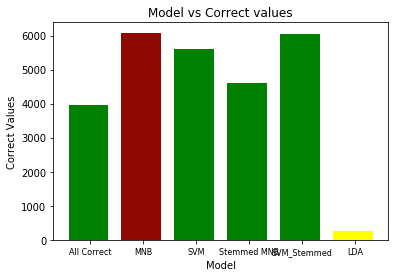

In [33]:
xticklabels = (names)
# Remove the single quotes, commas and enclosing square brackets
xtlabs = names

indices = np.arange(len(names))
width = 0.75
fig = plt.figure()
col=('green','#900900','green','green','green','yellow')
plt.title('Model vs Correct values')
plt.xlabel('Model')
plt.ylabel('Correct Values')
plt.bar(indices, plot_data, width,color=col)
plt.xticks(indices + width * 0.05, xtlabs, rotation='horizontal', fontsize=8)

plt.savefig('Model_Correct.png')
plt.show()


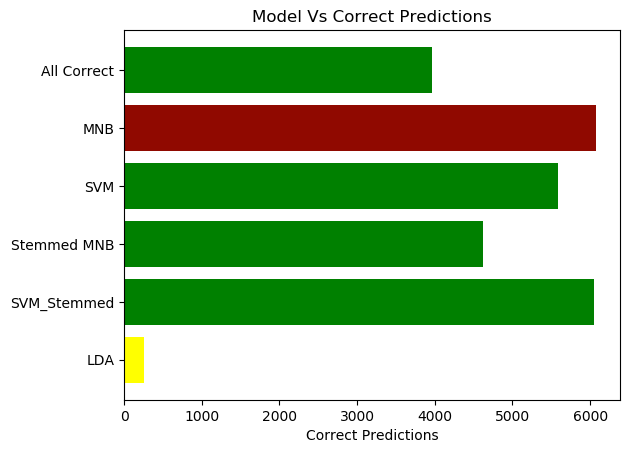

In [34]:

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = names
y_pos = np.arange(len(people))
performance = plot_data
error = np.random.rand(len(people))
col=('green','#900900','green','green','green','yellow')
ax.barh(y_pos, performance, xerr=error, align='center',
        color=col, ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correct Predictions')
ax.set_title('Model Vs Correct Predictions')
plt.show()

In [44]:
len(predicted_best[predicted_best==test['Component/s']])/len(predicted_best)

0.7364087661944545

In [45]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(test['Component/s'], predicted_best)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
recall

array([0.64      , 0.88607595, 0.5       , 0.46153846, 0.        ,
       0.57142857, 0.3       , 0.2       , 0.46820809, 0.25      ,
       0.        , 1.        , 0.44827586, 0.77777778, 0.82352941,
       0.25      , 0.81355932, 0.19075145, 0.5       , 0.56018519,
       0.77447552, 0.3       , 0.        , 0.58333333, 0.72093023,
       0.30851064, 0.8584127 , 0.853125  , 0.53846154, 0.53125   ,
       0.73809524, 0.8019802 , 0.        , 0.81383648, 0.76      ,
       0.46428571, 0.75      , 0.83393502, 0.75      , 0.79960707,
       0.42222222, 0.8358209 , 0.57528958, 0.77419355, 0.29166667,
       0.09090909, 0.63257576, 0.73076923, 0.85714286, 0.84074074,
       0.7826087 , 0.        , 0.08      , 0.2       , 0.75949367,
       0.77777778, 0.91304348, 1.        ])

In [51]:
precision

array([0.72727273, 0.86419753, 0.5       , 0.75      ,        nan,
       0.66666667, 0.6       , 0.25      , 0.61832061, 0.16666667,
              nan, 0.5       , 0.23214286, 0.77777778, 0.875     ,
       0.5       , 0.77108434, 0.28205128, 0.33333333, 0.64705882,
       0.7088    , 0.52941176,        nan, 0.875     , 0.76859504,
       0.41134752, 0.87338501, 0.55600815, 0.63636364, 0.5483871 ,
       0.775     , 0.89667897,        nan, 0.7532014 , 0.77027027,
       0.36516854, 0.66666667, 0.72985782, 1.        , 0.85504202,
       0.51351351, 0.82962963, 0.57976654, 0.84848485, 0.40384615,
       0.11111111, 0.75565611, 0.80851064, 0.70588235, 0.84386617,
       0.85714286,        nan, 0.33333333, 0.5       , 0.76923077,
       1.        , 0.91304348, 0.875     ])

In [66]:
((2*precision*recall)/(precision +recall))

array([0.68085106, 0.875     , 0.5       , 0.57142857,        nan,
       0.61538462, 0.4       , 0.22222222, 0.53289474, 0.2       ,
              nan, 0.66666667, 0.30588235, 0.77777778, 0.84848485,
       0.33333333, 0.79175258, 0.22758621, 0.4       , 0.60049628,
       0.74018379, 0.38297872,        nan, 0.7       , 0.744     ,
       0.35258359, 0.86583413, 0.67324291, 0.58333333, 0.53968254,
       0.75609756, 0.8466899 ,        nan, 0.78234583, 0.76510067,
       0.40880503, 0.70588235, 0.77843302, 0.85714286, 0.82639594,
       0.46341463, 0.83271375, 0.57751938, 0.80963855, 0.33870968,
       0.1       , 0.68865979, 0.76767677, 0.77419355, 0.84230056,
       0.81818182,        nan, 0.12903226, 0.28571429, 0.76433121,
       0.875     , 0.91304348, 0.93333333])

In [63]:
(2*precision*recall)/(precision +recall)

array([0.68085106, 0.875     , 0.5       , 0.57142857,        nan,
       0.61538462, 0.4       , 0.22222222, 0.53289474, 0.2       ,
              nan, 0.66666667, 0.30588235, 0.77777778, 0.84848485,
       0.33333333, 0.79175258, 0.22758621, 0.4       , 0.60049628,
       0.74018379, 0.38297872,        nan, 0.7       , 0.744     ,
       0.35258359, 0.86583413, 0.67324291, 0.58333333, 0.53968254,
       0.75609756, 0.8466899 ,        nan, 0.78234583, 0.76510067,
       0.40880503, 0.70588235, 0.77843302, 0.85714286, 0.82639594,
       0.46341463, 0.83271375, 0.57751938, 0.80963855, 0.33870968,
       0.1       , 0.68865979, 0.76767677, 0.77419355, 0.84230056,
       0.81818182,        nan, 0.12903226, 0.28571429, 0.76433121,
       0.875     , 0.91304348, 0.93333333])

In [69]:
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,16,3,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,70,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,5,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,3,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,81,0,...,0,2,2,0,3,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,9,...,0,0,0,0,0,0,0,0,0,0
